<a href="https://colab.research.google.com/github/NizarArdansyah/Capstone-Project-Machine-Learning/blob/main/Kmeans%20plants%20recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisasi
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import csv
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Informasi Dataset

In [4]:
df = pd.read_csv('Crop_recommendation.csv')

df.head()
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,49.225714,53.672381,48.537619,25.647571,71.093299,6.456942,100.067030
std,37.194613,33.695004,51.803317,5.174487,22.683467,0.784002,53.848519
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,20.000000,27.000000,20.000000,22.602437,59.237124,5.948298,63.489314
50%,36.000000,52.000000,30.000000,25.667383,80.532760,6.414227,91.978786
75%,84.000000,69.000000,50.000000,28.684566,90.194600,6.910487,117.368990
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall label
0      90  42  43    20.879744  82.002744  6.502985  202.935536  padi
1      85  58  41    21.770462  80.319644  7.038096  226.655537  padi
2      60  55  44    23.004459  82.320763  7.840207  263.964248  padi
3      74  35  40    26.491096  80.158363  6.980401  242.864034  padi
4      78  42  42    20.130175  81.604873  7.628473  262.717340  padi
...   ...  ..  ..          ...        ...       ...         ...   ...
2095  107  34  32    26.774637  66.413269  6.780064  177.774507  kopi
2096   99  15  27    27.417112  56.636362  6.086922  127.924610  kopi
2097  118  33  30    24.131797  67.225123  6.362608  173.322839  kopi
2098  117  32  34    26.272418  52.127394  6.758793  127.175293  kopi
2099  104  18  30    23.603016  60.396475  6.779833  140.937041  kopi

[2100 rows x 8 columns]>

In [7]:
df = df.drop(['N','P','K','rainfall','ph'], axis=1)

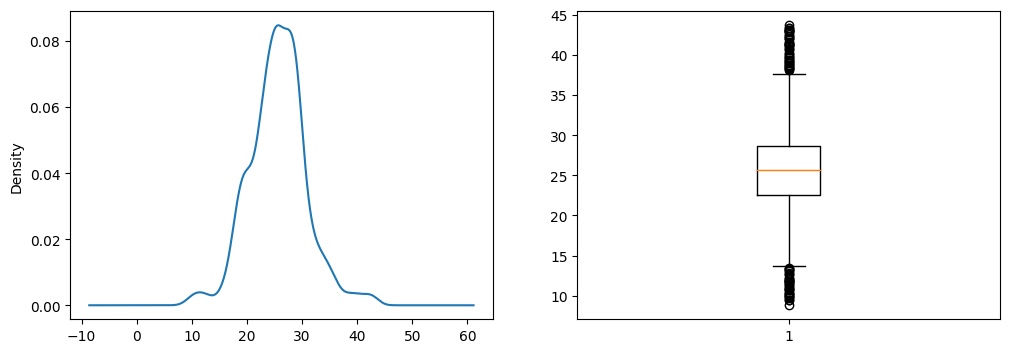

In [8]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['temperature'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['temperature'])
plt.show()

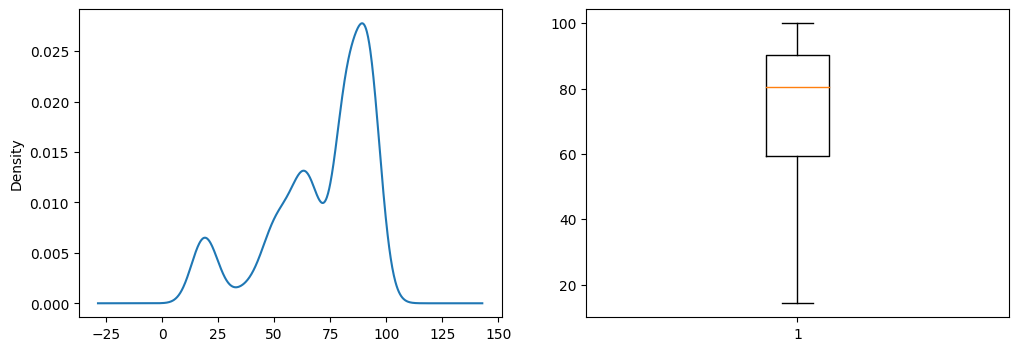

In [9]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['humidity'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['humidity'])
plt.show()

<Axes: xlabel='temperature'>

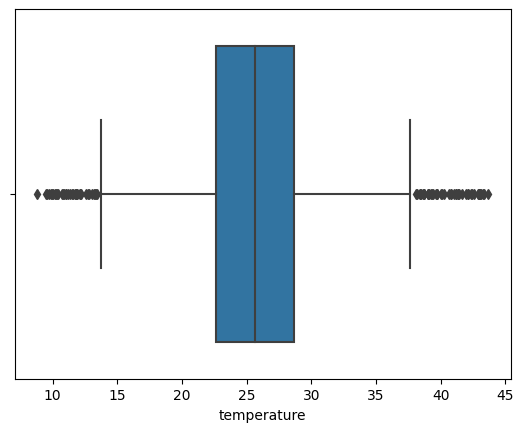

In [10]:
sns.boxplot(x=df['temperature'])

<Axes: xlabel='humidity'>

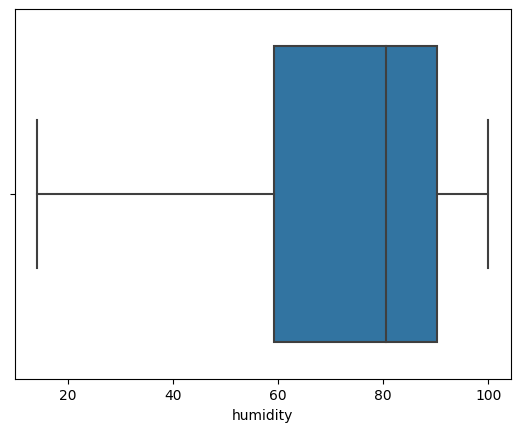

In [11]:
sns.boxplot(x=df['humidity'])

In [12]:
Q1 = df['temperature'].quantile(0.25)
Q3 = df['temperature'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 22.6024371125

Q3:
 28.68456602

IQR:
 6.0821289075

Min:
 13.47924375125

Max:
 37.807759381249994


In [13]:
filter_min = df['temperature']<boxplot_min
filter_max = df['temperature']>boxplot_max
data_df = df[~(filter_min|filter_max)] 
data_df.shape

(2019, 3)

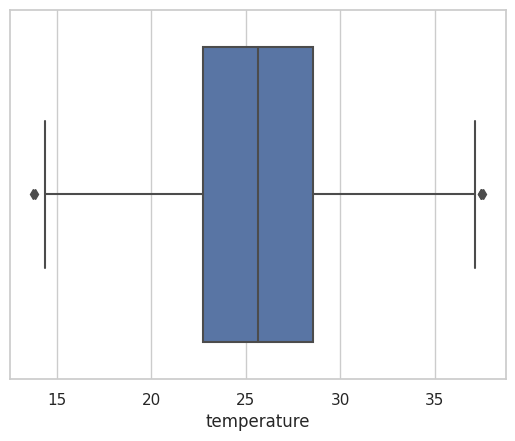

In [14]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_df['temperature'])

In [15]:
data_df.isnull().sum()

temperature    0
humidity       0
label          0
dtype: int64

In [16]:
# backup dataframe for encoding
data_df.to_csv('data_df.csv')
df_clean = data_df.copy()

In [17]:
df_clean.value_counts()

temperature  humidity   label         
13.703192    90.955894  jeruk             1
27.593501    91.797430  melon             1
27.672562    45.416920  mangga            1
27.667528    79.685428  pisang            1
27.654722    58.599863  kacang panjang    1
                                         ..
23.768816    90.598103  apel              1
23.761218    93.661643  apel              1
23.750331    92.881605  apel              1
23.738680    75.775038  kapas             1
37.588997    91.997404  pepaya            1
Length: 2019, dtype: int64

In [18]:
df_clean.tail()

,temperature,humidity,label
2095,26.774637,66.413269,kopi
2096,27.417112,56.636362,kopi
2097,24.131797,67.225123,kopi
2098,26.272418,52.127394,kopi
2099,23.603016,60.396475,kopi


In [19]:
for feat in df_clean.columns:
    hh = df_clean.groupby(feat)['label'].count()
    print(feat,',', 'Unique :',len(df_clean[feat].unique()))

temperature , Unique : 2019
humidity , Unique : 2019
label , Unique : 21


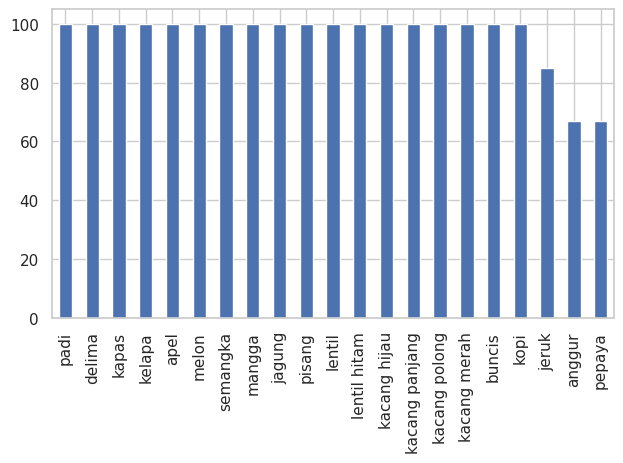

In [20]:
df_clean['label'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

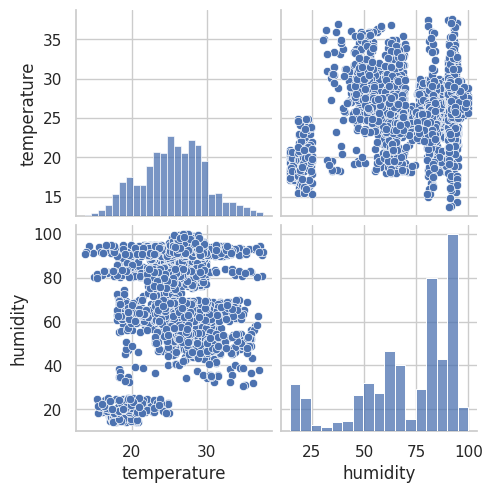

In [21]:
sns.pairplot(df_clean[[ 'temperature', 'humidity']])

In [41]:
#pip install imbalanced-learn scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd


# Menampilkan jumlah sampel sebelum SMOTE
print("Jumlah sampel sebelum SMOTE:")
print(df_clean['label'].value_counts())
print("=============================")

# Memisahkan fitur dan target
X = df_clean[['temperature', 'humidity']]
y = df_clean['label']

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Membentuk dataset baru setelah SMOTE
# Membuat dataset baru setelah SMOTE
df_resampled = pd.DataFrame(X_res, columns=['temperature', 'humidity'])
df_resampled['label'] = y_res

# Menampilkan jumlah sampel setelah SMOTE
print("\nJumlah sampel setelah SMOTE:")
print(y_res.value_counts())

Jumlah sampel sebelum SMOTE:
padi              100
delima            100
kapas             100
kelapa            100
apel              100
melon             100
semangka          100
mangga            100
jagung            100
pisang            100
lentil            100
lentil hitam      100
kacang hijau      100
kacang panjang    100
kacang polong     100
kacang merah      100
buncis            100
kopi              100
jeruk              85
anggur             67
pepaya             67
Name: label, dtype: int64

Jumlah sampel setelah SMOTE:
padi              100
mangga            100
kapas             100
kelapa            100
pepaya            100
jeruk             100
apel              100
melon             100
semangka          100
anggur            100
pisang            100
jagung            100
delima            100
lentil            100
lentil hitam      100
kacang hijau      100
kacang panjang    100
kacang polong     100
kacang merah      100
buncis            100
kopi         

Eksplorasi data menentukan korelasi terbaik

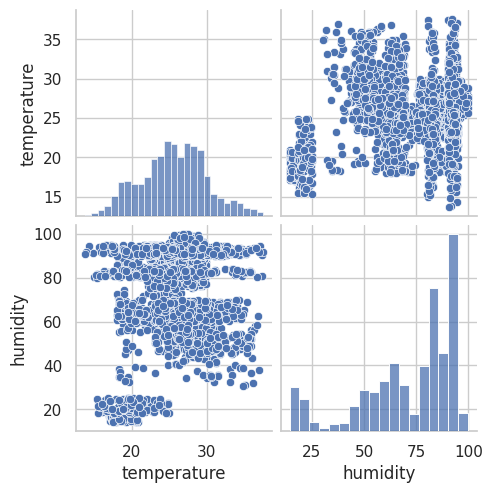

In [24]:
sns.pairplot(df_resampled)

<ipython-input-25-434b2e8f63db>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_resampled[x] , bins = 15)
<ipython-input-25-434b2e8f63db>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_resampled[x] , bins = 15)


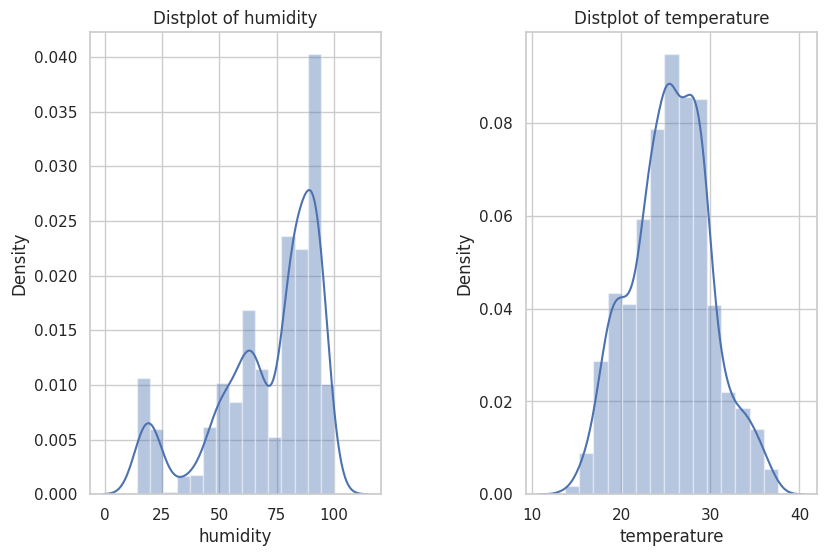

In [25]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['humidity' , 'temperature' ]:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df_resampled[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

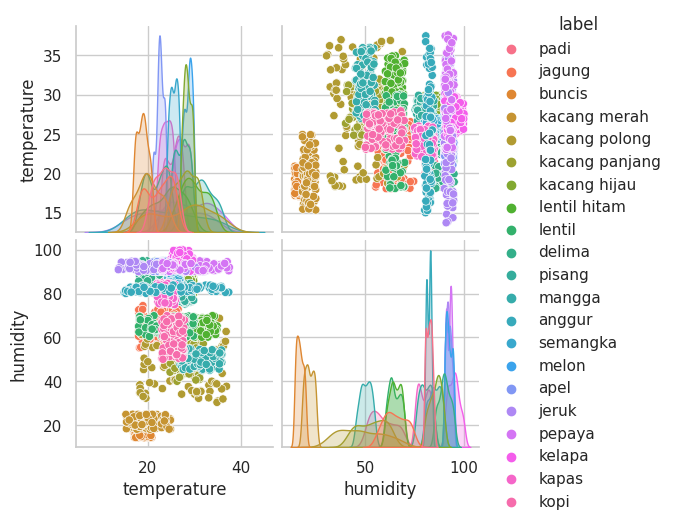

In [26]:
sns.pairplot(df_resampled, vars = ['temperature', 'humidity'], hue = "label")

In [27]:
df_resampled.corr()

<ipython-input-27-0d06f5513b6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_resampled.corr()


,temperature,humidity
temperature,1.000000,0.226035
humidity,0.226035,1.000000


<ipython-input-28-cbede33d5c4a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_resampled.corr());


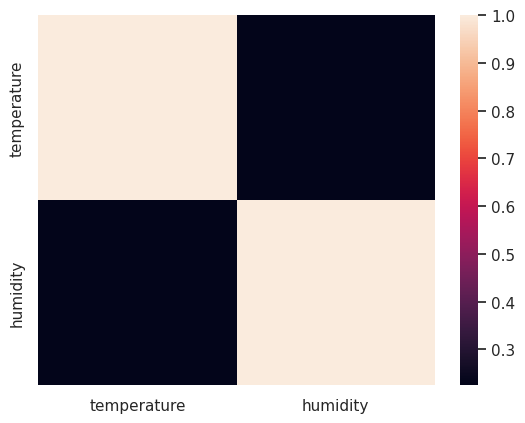

In [28]:
sns.heatmap(df_resampled.corr());

Normalisasi data

In [29]:
# data_array=[]

# # Baca file CSV dan masukkan data ke dalam array
# with open('Crop_recommendation.csv', 'r') as file:
#     reader = csv.reader(file)
#     next(reader)  # Skip header baris pertama jika ada
#     for row in reader:
#         data_array.append(row[:6])

# # Konversi array menjadi numpy array untuk kemudahan pengolahan data
# data_array = np.array(data_array)

# # Inisialisasi objek MinMaxScaler
# scaler = MinMaxScaler()

# # Normalisasi data tanaman
# data_tanaman_normal = scaler.fit_transform(data_array)

# print("Data Tanaman:")
# print(data_array)
# print("\nData Tanaman Setelah Normalisasi:")
# print(data_tanaman_normal)
# print("=======================")
# print(data_tanaman_normal[:10])
# print(data_tanaman_normal.shape)
# print(data_array.shape)


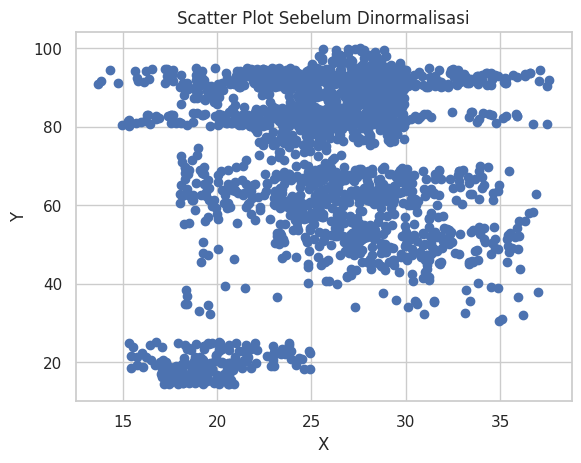

In [30]:
# Mendapatkan kolom temperature sebagai data x
x = df_resampled[['temperature']]

# Mendapatkan kolom humidity sebagai data y
y = df_resampled[['humidity']]

# Membuat scatter plot
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot Sebelum Dinormalisasi')

# Menampilkan plot
plt.show()


In [28]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=10)

print('training dataset:')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset:
(1680, 2)
(1680,)

testing dataset:
(420, 2)
(420,)


**Kmeans Model**

Menentukan Jumlah Cluster dengan metode silhouette_scores

In [33]:
df_resampled = df_resampled.drop(['label'],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

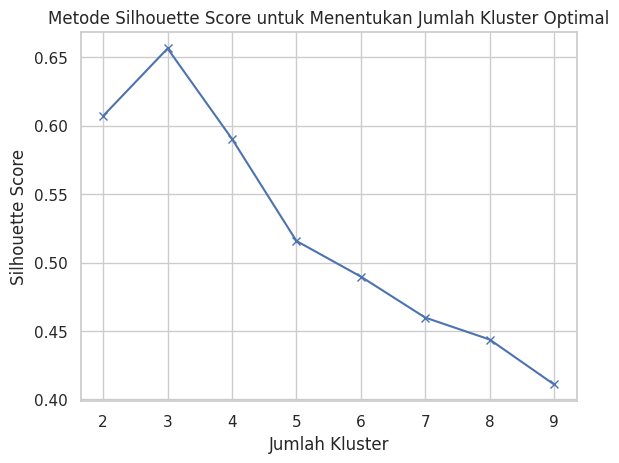

In [34]:


# Menyimpan skor siluet untuk setiap jumlah kluster
silhouette_scores = []

# K range untuk percobaan jumlah kluster
k_range = range(2, 10)

# Melakukan klasterisasi dan menghitung skor siluet untuk setiap jumlah kluster
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_resampled)
    labels = kmeans.labels_
    score = silhouette_score(df_resampled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Silhouette Score')
plt.title('Metode Silhouette Score untuk Menentukan Jumlah Kluster Optimal')
plt.show()


Menentukan Jumlah Cluster dengan metode Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

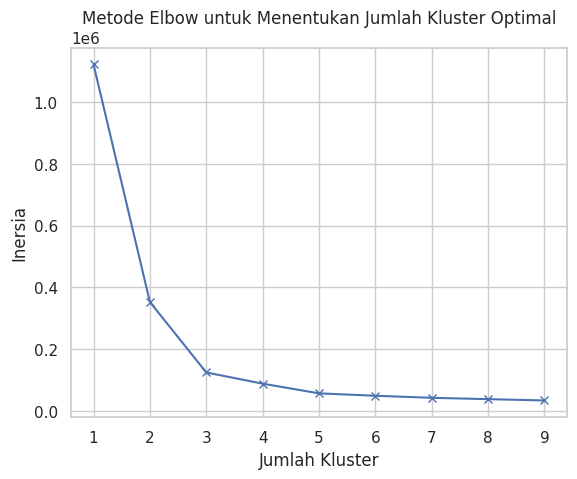

In [35]:

# Menyimpan nilai inersia untuk setiap jumlah kluster
inertia = []

# K range untuk percobaan jumlah kluster
k_range = range(1, 10)

# Melakukan klasterisasi untuk setiap jumlah kluster
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_resampled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.show()


Membuat model K-Means

In [36]:

# Jumlah kluster yang diinginkan
n_clusters = 3

# Inisialisasi model K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Melatih model dengan data tanaman
kmeans.fit(X_res)


# Menggambarkan pusat-pusat kluster
centers = kmeans.cluster_centers_

# Prediksi kluster untuk data tanaman
labels = kmeans.labels_


# Cetak pusat-pusat kluster
print("Pusat-Pusat Kluster:")
print(centers)

# Cetak kluster untuk setiap data tanaman
print("\nKluster untuk Setiap Data Tanaman:")
for i, label in enumerate(labels):
    print(f"Data {i+1}: Kluster {label+1}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pusat-Pusat Kluster:
[[27.15072617 58.53607733]
 [25.69869235 87.32928992]
 [20.37858121 21.03645814]]

Kluster untuk Setiap Data Tanaman:
Data 1: Kluster 2
Data 2: Kluster 2
Data 3: Kluster 2
Data 4: Kluster 2
Data 5: Kluster 2
Data 6: Kluster 2
Data 7: Kluster 2
Data 8: Kluster 2
Data 9: Kluster 2
Data 10: Kluster 2
Data 11: Kluster 2
Data 12: Kluster 2
Data 13: Kluster 2
Data 14: Kluster 2
Data 15: Kluster 2
Data 16: Kluster 2
Data 17: Kluster 2
Data 18: Kluster 2
Data 19: Kluster 2
Data 20: Kluster 2
Data 21: Kluster 2
Data 22: Kluster 2
Data 23: Kluster 2
Data 24: Kluster 2
Data 25: Kluster 2
Data 26: Kluster 2
Data 27: Kluster 2
Data 28: Kluster 2
Data 29: Kluster 2
Data 30: Kluster 2
Data 31: Kluster 2
Data 32: Kluster 2
Data 33: Kluster 2
Data 34: Kluster 2
Data 35: Kluster 2
Data 36: Kluster 2
Data 37: Kluster 2
Data 38: Kluster 2
Data 39: Kluster 2
Data 40: Kluster 2
Data 41: Kluster 2
Data 42: Kluster 2
Data 43: Kluster 2
Data 44: Kluster 2
Data 45: Kluster 2
Data 46: Kluste

In [37]:
kmeans.cluster_centers_

array([[27.15072617, 58.53607733],
       [25.69869235, 87.32928992],
       [20.37858121, 21.03645814]])

In [40]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 123950.5548000806


In [39]:
# Membuat scatter plot untuk setiap kluster
for i in range(len(data_tanaman_normal)):
    plt.scatter(data_tanaman_normal[i, 0], data_tanaman_normal[i, 1], c='C'+str(labels[i]))


# Membuat scatter plot untuk pusat-pusat kluster
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', marker='X', label='Centers')

plt.xlabel('Suhu')
plt.ylabel('Kelembaban')
plt.title('Data Clustering dengan K-means')
plt.legend()
plt.show()

KeyError: ignored